# Bank churn prediction and modelling

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
from IPython.display import display
import matplotlib.pyplot as plt
data = pd.read_csv("Churn_Modelling.csv")
overview = data.head(10)
target = data['Exited']
display(overview)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [2]:
X = data.iloc[:,3:13]
target = np.array(target)
display(X.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [3]:
target_0 = data[data['Exited'] == 0]['Exited'].count()
target_1 = data[data['Exited']== 1]['Exited'].count()
print(target_0,target_1)

7963 2037


No handles with labels found to put in legend.


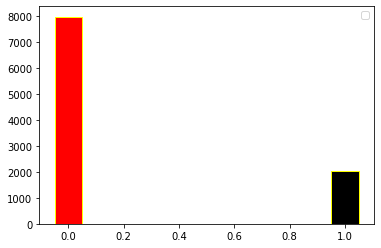

In [4]:
%matplotlib inline
labels = [0,1]
plt.bar(labels[0],target_0, width=0.1,color = 'red',edgecolor='yellow')
plt.bar(labels[1],target_1,width=0.1,color = 'black',edgecolor='yellow')
plt.legend()

### visualization

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


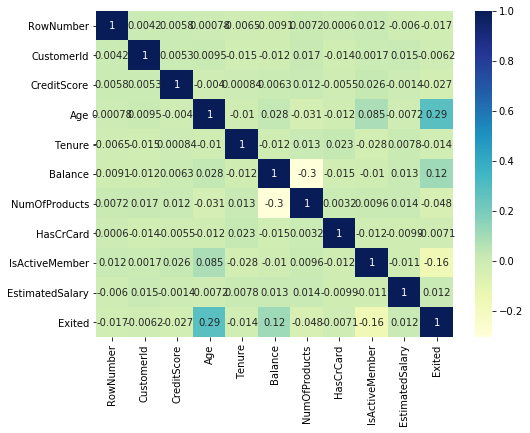

In [7]:
fig,axis = plt.subplots(figsize=(8,6))
axis = sb.heatmap(data=data.corr(method='pearson',min_periods=1),annot=True,cmap="YlGnBu")

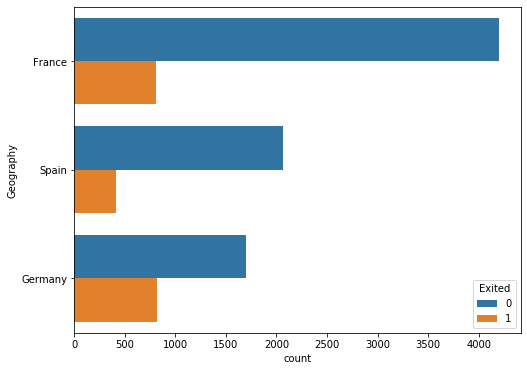

In [8]:
from itertools import chain
countmale = data[data['Gender']=='Male']['Gender'].count()
countfemale=data[data['Gender']=='Female']['Gender'].count()    
fig,aix = plt.subplots(figsize=(8,6))
#print(countmale)
#print(countfemale)
aix = sb.countplot(hue='Exited',y='Geography',data=data)

In [9]:
cal= data[data['IsActiveMember']==1].count()
cal2 = data[data['Exited']==1].count()
ave = (cal2/(cal+cal2))*100
va= '%.1f '  % ave[1]
print(va+'%')

28.3 %


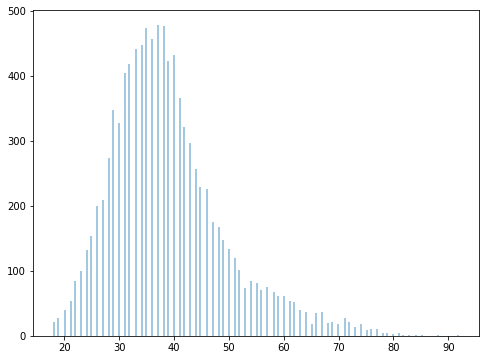

In [10]:
age = np.array(data['Age'])
fig,axis = plt.subplots(figsize=(8,6))
axis = sb.distplot(age,kde=False,bins=200)

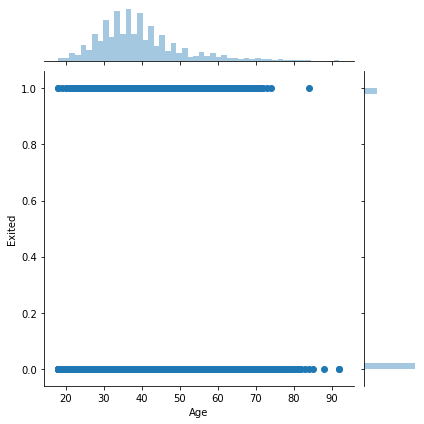

In [11]:
axis = sb.jointplot(x='Age',y='Exited',data = data)

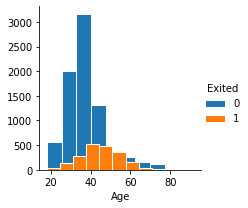

In [12]:
g = sb.FacetGrid(data,hue = 'Exited')
(g.map(plt.hist,'Age',edgecolor="w").add_legend())

In [13]:
array1 = np.array(data['IsActiveMember'])
array2 = np.array(data['Exited'])
index = len(array1)
count = 0
for i in range(index):
    if(array1[i]==1 and array2[i]==1):
        count +=1
print(count)

735


In [14]:
France = float(data[data['Geography']=='France']['Geography'].count())
Spain = float(data[data['Geography']=='Spain']['Geography'].count())
Germany = float(data[data['Geography']=='Germany']['Geography'].count())
print(France+Spain+Germany)

10000.0


In [16]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


data = dict(type='choropleth',
           locations=['ESP','FRA','DEU'],
           colorscale='YlGnBu',
           text = ['Spain','France','Germany'],
           z=[France,Spain,Germany],
           colorbar={'title':'number in each geography'})
layout = dict(title='Counting the numbers of each nationality',
              geo=dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data=[data],layout=layout)


In [17]:
iplot(choromap)

### Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
X['Geography'] = label.fit_transform(X['Geography'])
X['Gender'] = label.fit_transform(X['Gender'])
print(X['Gender'].head(7))

0    0
1    0
2    0
3    0
4    0
5    1
6    1
Name: Gender, dtype: int64


In [18]:
onehotencoding = OneHotEncoder(categorical_features = [1])
X = onehotencoding.fit_transform(X).toarray()
print(X)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning:

The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.



### Splitting Data

In [19]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)

### Resampling Training Data

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from collections import Counter
go = RandomOverSampler(random_state=42)
train_x_resample,train_y_resample = go.fit_resample(train_x,train_y)
# before resampling the number of each catogorical
print(Counter(train_y).items())
# After resampling the number of each catogorical
print(Counter(train_y_resample).items())
# now let use under sampling 
go1 = ClusterCentroids(random_state=0)
train_x_resample1,train_y_resample1 = go1.fit_resample(train_x,train_y)
# before resampling the number of each catogorical
print(Counter(train_y).items())
# After resampling the number of each catogorical
print(Counter(train_y_resample1).items())
# now let combine two over and under resample
go2 = SMOTEENN(random_state=0) 
train_x_resample2,train_y_resample2 = go2.fit_resample(train_x,train_y)
# before resampling the number of each catogorical
print(Counter(train_y).items())
# After resampling the number of each catogorical
print(Counter(train_y_resample2).items())

Using TensorFlow backend.


dict_items([(1, 1540), (0, 5960)])
dict_items([(1, 5960), (0, 5960)])
dict_items([(1, 1540), (0, 5960)])
dict_items([(0, 1540), (1, 1540)])
dict_items([(1, 1540), (0, 5960)])
dict_items([(0, 2102), (1, 2637)])


### Classifiers and Evaluation

In [21]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,cohen_kappa_score,precision_score
from time import *
def choose_best(model, train_x , train_y , test_x , test_y):
    result = {}
    
    #for calculate time of fitting data
    start = time()
    model.fit(train_x,train_y)
    end = time()
    result['train_time'] = end-start
    
    #for prediction
    
    start = time()
    test_y_new = model.predict(test_x)
    train_y_new = model.predict(train_x)
    end = time()
    
    result["prediction_time"] = end - start
    
    result['acc_prediction_train'] = accuracy_score(train_y,train_y_new)
    result['recall_prediction_train'] = recall_score(train_y,train_y_new)
    result['f1_score_test'] = f1_score(test_y,test_y_new)
    result['recall_prediction_test'] = recall_score(test_y,test_y_new)
    result['cohen_kappa_score'] = cohen_kappa_score(test_y,test_y_new)
    result['precision_score'] = precision_score(test_y,test_y_new)
    print('name of model {}'.format(model))
    
    return result
    

In [22]:
from sklearn.linear_model import LogisticRegression

classifier_1 = LogisticRegression(random_state = 42,solver='lbfgs')
values1 = choose_best(classifier_1,train_x_resample,train_y_resample,test_x,test_y)
values1n = choose_best(classifier_1,train_x_resample1,train_y_resample1,test_x,test_y)
values1nn = choose_best(classifier_1,train_x_resample2,train_y_resample2,test_x,test_y)

name of model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
name of model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
name of model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [23]:
from sklearn.ensemble import AdaBoostClassifier

classifier_2 = AdaBoostClassifier(random_state=42)
values2 = choose_best(classifier_2,train_x_resample,train_y_resample,test_x,test_y)
values2n = choose_best(classifier_2,train_x_resample1,train_y_resample1,test_x,test_y)
values2nn = choose_best(classifier_2,train_x_resample2,train_y_resample2,test_x,test_y)

name of model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
name of model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)
name of model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_3 = GradientBoostingClassifier()
values3 = choose_best(classifier_3,train_x_resample,train_y_resample,test_x,test_y)
values3n = choose_best(classifier_3,train_x_resample1,train_y_resample1,test_x,test_y)
values3nn = choose_best(classifier_3,train_x_resample2,train_y_resample2,test_x,test_y)

name of model GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
name of model GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_sta

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier_4 = RandomForestClassifier(n_estimators=100) #warning 10 to 100
values4 = choose_best(classifier_4,train_x_resample,train_y_resample,test_x,test_y)
values4n = choose_best(classifier_4,train_x_resample1,train_y_resample1,test_x,test_y)
values4nn = choose_best(classifier_4,train_x_resample2,train_y_resample2,test_x,test_y)

name of model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
name of model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
name of model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_

This Dataframe show the result of each classifiers with resampling using : **over_Sampling** method. 

In [26]:
moduels = pd.DataFrame({'name_model':["logistic regression","adaboost","gradient boost","random forest"],\
                       'accuracy_training':[values1["acc_prediction_train"],values2['acc_prediction_train'],values3['acc_prediction_train'],values4['acc_prediction_train']],\
                       "recall_testing":[values1["recall_prediction_test"],values2["recall_prediction_test"],values3["recall_prediction_test"],values4["recall_prediction_test"]],\
                        "f1_score":[values1["f1_score_test"],values2["f1_score_test"],values3["f1_score_test"],values4["f1_score_test"]],\
                        "precision_test":[values1["precision_score"],values2["precision_score"],values3["precision_score"],values4["precision_score"]],\
                        "kappa_score":[values1["cohen_kappa_score"],values2["cohen_kappa_score"],values3["cohen_kappa_score"],values4["cohen_kappa_score"]],\
                        "timing_train":[values1["train_time"],values2["train_time"],values3["train_time"],values4["train_time"]],\
                       "timing_test":[values1["prediction_time"],values2["prediction_time"],values3["prediction_time"],values4["prediction_time"]]})
moduels.sort_values(by =["f1_score"], ascending = False)

,name_model,accuracy_training,recall_testing,f1_score,precision_test,kappa_score,timing_train,timing_test
3,random forest,1.000000,0.549296,0.615558,0.700000,0.534112,1.252563,0.246159
2,gradient boost,0.801510,0.756539,0.608414,0.508796,0.486294,0.894737,0.028600
1,adaboost,0.774497,0.758551,0.596991,0.492167,0.468928,0.475134,0.094314
0,logistic regression,0.665352,0.653924,0.421530,0.311005,0.208173,0.224077,0.000638


This Dataframe show the result of each classifiers with resampling using : **Under_Sampling** method. 

In [27]:
moduels = pd.DataFrame({'name_model':["logistic regression","adaboost","gradient boost","random forest"],\
                       'accuracy_training':[values1n["acc_prediction_train"],values2n['acc_prediction_train'],values3n['acc_prediction_train'],values4n['acc_prediction_train']],\
                       "recall_testing":[values1n["recall_prediction_test"],values2n["recall_prediction_test"],values3n["recall_prediction_test"],values4n["recall_prediction_test"]],\
                        "f1_score":[values1n["f1_score_test"],values2n["f1_score_test"],values3n["f1_score_test"],values4n["f1_score_test"]],\
                        "kappa_score":[values1n["cohen_kappa_score"],values2n["cohen_kappa_score"],values3n["cohen_kappa_score"],values4n["cohen_kappa_score"]],\
                        "precision_test":[values1n["precision_score"],values2n["precision_score"],values3n["precision_score"],values4n["precision_score"]],\
                        "timing_train":[values1n["train_time"],values2n["train_time"],values3n["train_time"],values4n["train_time"]],\
                       "timing_test":[values1n["prediction_time"],values2n["prediction_time"],values3n["prediction_time"],values4n["prediction_time"]]})
moduels.sort_values(by =["f1_score"], ascending = False)

,name_model,accuracy_training,recall_testing,f1_score,kappa_score,precision_test,timing_train,timing_test
0,logistic regression,0.681169,0.684105,0.392157,0.151484,0.274859,0.037641,0.000352
3,random forest,1.000000,0.951710,0.356443,0.049197,0.219286,0.313802,0.076661
2,gradient boost,0.950000,0.945674,0.354583,0.046568,0.218199,0.280129,0.011217
1,adaboost,0.924026,0.943662,0.349088,0.037030,0.214155,0.167245,0.045597


This Dataframe show the result of each classifiers with resampling using : **Combination of twos** method. 

In [28]:
moduels = pd.DataFrame({'name_model':["logistic regression","adaboost","gradient boost","random forest"],\
                       'accuracy_training':[values1nn["acc_prediction_train"],values2nn['acc_prediction_train'],values3nn['acc_prediction_train'],values4nn['acc_prediction_train']],\
                       "recall_testing":[values1nn["recall_prediction_test"],values2nn["recall_prediction_test"],values3nn["recall_prediction_test"],values4nn["recall_prediction_test"]],\
                        "f1_score":[values1nn["f1_score_test"],values2nn["f1_score_test"],values3nn["f1_score_test"],values4nn["f1_score_test"]],\
                        "kappa_score":[values1nn["cohen_kappa_score"],values2nn["cohen_kappa_score"],values3nn["cohen_kappa_score"],values4nn["cohen_kappa_score"]],\
                        "precision_test":[values1nn["precision_score"],values2nn["precision_score"],values3nn["precision_score"],values4nn["precision_score"]],\
                        "timing_train":[values1nn["train_time"],values2nn["train_time"],values3nn["train_time"],values4nn["train_time"]],\
                       "timing_test":[values1nn["prediction_time"],values2nn["prediction_time"],values3nn["prediction_time"],values4nn["prediction_time"]]})
moduels.sort_values(by =["f1_score"], ascending = False)

,name_model,accuracy_training,recall_testing,f1_score,kappa_score,precision_test,timing_train,timing_test
2,gradient boost,0.926989,0.569416,0.600212,0.507621,0.634529,0.487153,0.016244
3,random forest,1.000000,0.531187,0.580858,0.488720,0.640777,0.542070,0.106777
1,adaboost,0.910108,0.585513,0.575099,0.467318,0.565049,0.272673,0.054489
0,logistic regression,0.698671,0.738431,0.399782,0.154657,0.274085,0.051495,0.000407


based on kappa score and f1 score that is best choose to evalute the best model in imbalanced dataset, we arre choose the gradient boost as the classifier for this problem and we are choose the resampling method number **3** that is combination of under_sampler and oversampler.

### Tunning the parameters

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score,make_scorer,classification_report,confusion_matrix,roc_auc_score
parameters = [{'loss':['deviance'],'learning_rate':[0.1,0.2,0.3,0.4],'n_estimators':[50,100],
              'max_depth':[3,6,10,15]}]
scorer = make_scorer(fbeta_score,beta=0.5)
grid_search =  GridSearchCV(estimator = classifier_3, param_grid  = parameters, scoring = scorer ,cv = 5)
grid_fit = grid_search.fit(train_x_resample,train_y_resample)
best_accuracy = grid_fit.best_score_
best_para = grid_fit.best_params_
best_clas = grid_fit.best_estimator_
prdict_y  = best_clas.predict(test_x)
score = fbeta_score(test_y,prdict_y,beta=0.5)
print(best_accuracy,best_para,score)

0.9419046340899516 {'learning_rate': 0.3, 'loss': 'deviance', 'max_depth': 10, 'n_estimators': 100} 0.6423874557410217


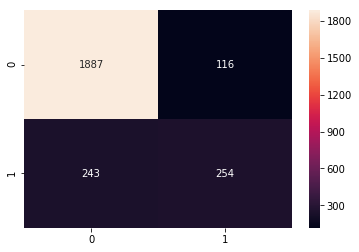

In [30]:
confusionMatrix = confusion_matrix(test_y,prdict_y)
sb.heatmap(confusionMatrix,annot=True,fmt='d')

In [31]:
print(classification_report(test_y,prdict_y))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2003
           1       0.69      0.51      0.59       497

   micro avg       0.86      0.86      0.86      2500
   macro avg       0.79      0.73      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [32]:
roc = roc_auc_score(test_y,prdict_y)
print(roc)

0.7265766340428995
